<a href="https://colab.research.google.com/github/Ymy9he/assignment3/blob/main/Assignment_3_responses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/knn`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [43]:
! git clone https://github.com/Ymy9he/assignment3


fatal: destination path 'assignment3' already exists and is not an empty directory.


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

def pn(x):
    print(x,'\n')
    return



In [45]:
# Question 1.
df = pd.read_csv('./assignment3/data/car_data.csv')
df.shape #Dimensions of the data: (1000, 5)
df.head()

#Question 2:
#UserID: unique identifer
#Gender: represents each gender either as a female or male / categorical
#Age: age of each user in years/ numeric
#Annual Salary: annaul salary of each user measured using moneytary units/ numeric
#purchased: whether they  brought a car as a dummy

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values) # No missing values to clean

#creating a dummy variable for gender when Male=0 and Female= 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
print(df)

vars = ['Age','AnnualSalary','Gender']
y = df['Purchased'] # Create target variable vector
X = df.loc[:,vars] # Create feature matrix
print()


Missing Values:
User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64
     User ID  Gender  Age  AnnualSalary  Purchased
0        385       0   35         20000          0
1        681       0   40         43500          0
2        353       0   49         74000          0
3        895       0   40        107500          1
4        661       0   25         79000          0
..       ...     ...  ...           ...        ...
995      863       0   38         59000          0
996      800       1   47         23500          0
997      407       1   28        138500          1
998      299       1   48        134000          1
999      687       1   44         73500          0

[1000 rows x 5 columns]



In [46]:
#Question 3

from sklearn.neighbors import KNeighborsRegressor

# Maxmin normalization function:
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return(x)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
pn(X.describe())


               Age  AnnualSalary       Gender
count  1000.000000   1000.000000  1000.000000
mean      0.491244      0.419556     0.516000
std       0.237935      0.250824     0.499994
min       0.000000      0.000000     0.000000
25%       0.311111      0.228182     0.000000
50%       0.488889      0.414545     1.000000
75%       0.666667      0.545455     1.000000
max       1.000000      1.000000     1.000000 



In [47]:
#Question 4
# Split the dataset into a training set (80%) and a testing set (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)


[7]


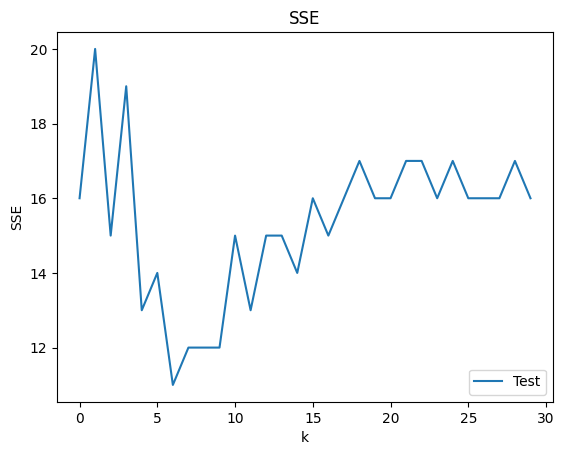

In [48]:
#Question 5

# Import the classifier module:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # Import the kNN classifier tool

# Determine the optimal k:
k_bar = 30
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(X_train,y_train) # Train the model on our data
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

In [49]:
#Question 6
model = KNeighborsClassifier(n_neighbors=7) # Create a sk model for k
fitted_model = model.fit(X_train,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test) # Predict values for test set

pd.crosstab(y_test, y_hat)


col_0,0,1
Purchased,,
0,119,6
1,5,70


In [50]:
#Question 7
import pandas as pd
# Resplit the data including the gender variable:
from sklearn.model_selection import train_test_split
vars = ['Age','AnnualSalary','Gender']
X = df.loc[:,vars]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)


# Use the selected k to train the model, not using the gender variable:
model = KNeighborsClassifier(n_neighbors=7) # Create a sk model for k
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train) # Train the model o
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1)) # Predict values for tes
# Break out the true/predicted values by recorded sex:
y_hat_M = y_hat[ X_test['Gender'] == 1]
y_hat_F = y_hat[ X_test['Gender'] == 0]
y_M = y_test[ X_test['Gender'] == 1]
y_F = y_test[ X_test['Gender'] == 0]


In [51]:
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,60,3
1,10,18


In [52]:
pd.crosstab(y_M, y_hat_M)


col_0,0,1
Purchased,,
0,57,5
1,13,34


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
! git clone https://github.com/Ymy9he/assignment3


fatal: destination path 'assignment3' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

def pn(x):
    print(x,'\n')
    return

In [ ]:
# Question 1.

df = pd.read_csv('./assignment3/data/USA_cars_datasets.csv')

# Select specific variables and drop the rest
selected_columns = ['price', 'year', 'mileage']
df = df[selected_columns]
# Check for missing values (NA's)
missing_values = df.isna().sum()
print("\nMissing Values:")
print(missing_values)

print(df.shape )#Dimensions of the data: (2499,3)
df.head()






Missing Values:
price      0
year       0
mileage    0
dtype: int64
(2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [ ]:
# Question 2
X = df.loc[:,['year','mileage']] # Create feature matrix
y = df['price']

# Maxmin normalization function:
def maxmin(x):
    x= (x-min(x))/(max(x)-min(x))
    return(x)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
pn(X.describe())




              year       mileage
count  2499.000000  2.499000e+03
mean   2016.714286  5.229869e+04
std       3.442656  5.970552e+04
min    1973.000000  0.000000e+00
25%    2016.000000  2.146650e+04
50%    2018.000000  3.536500e+04
75%    2019.000000  6.347250e+04
max    2020.000000  1.017936e+06 

              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000 



In [ ]:
#Question 3:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

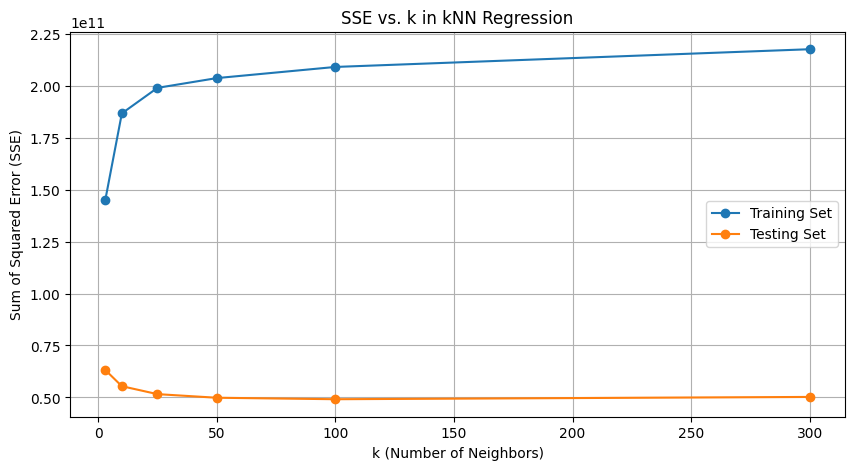

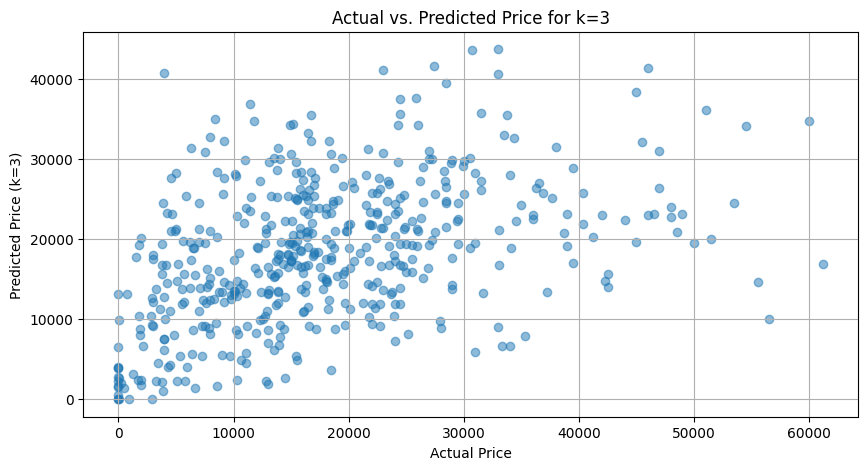

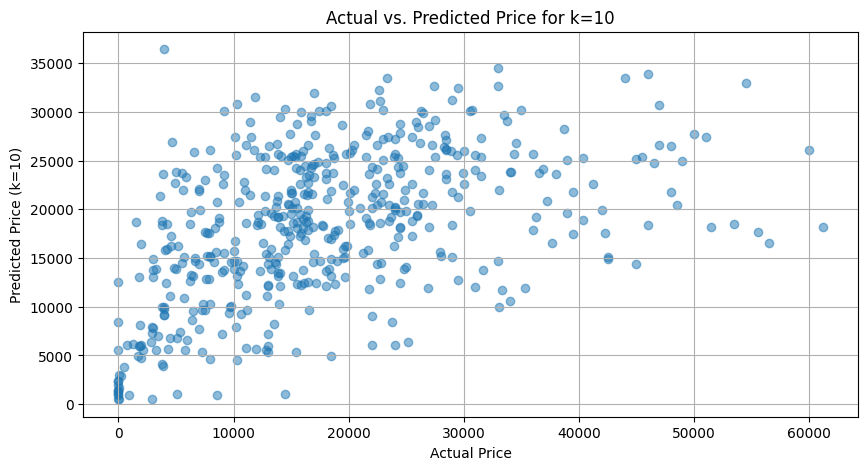

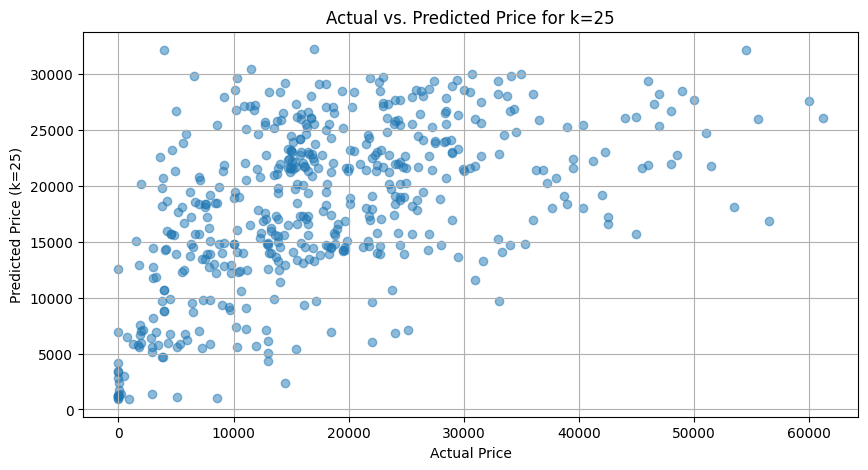

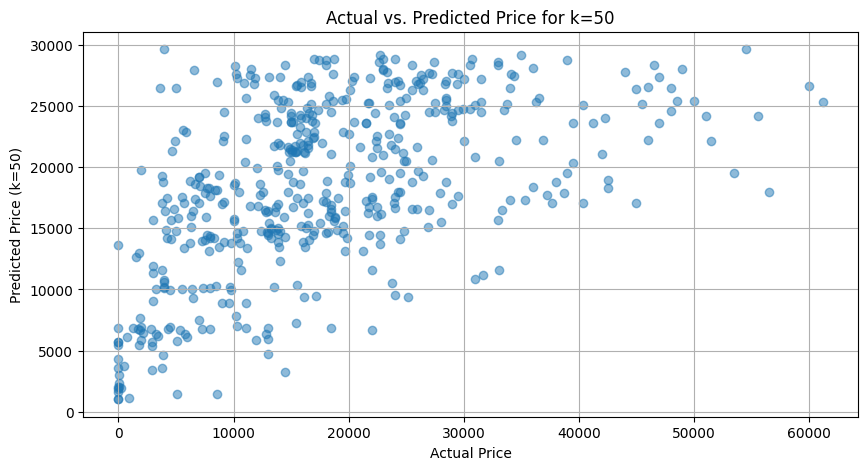

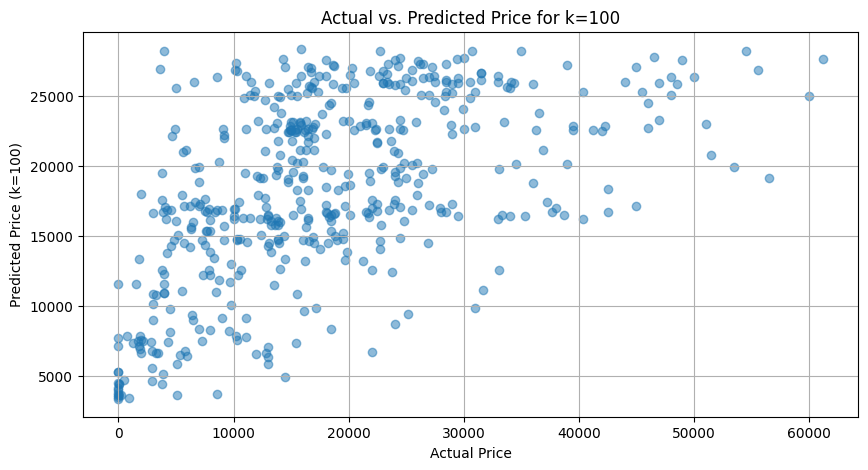

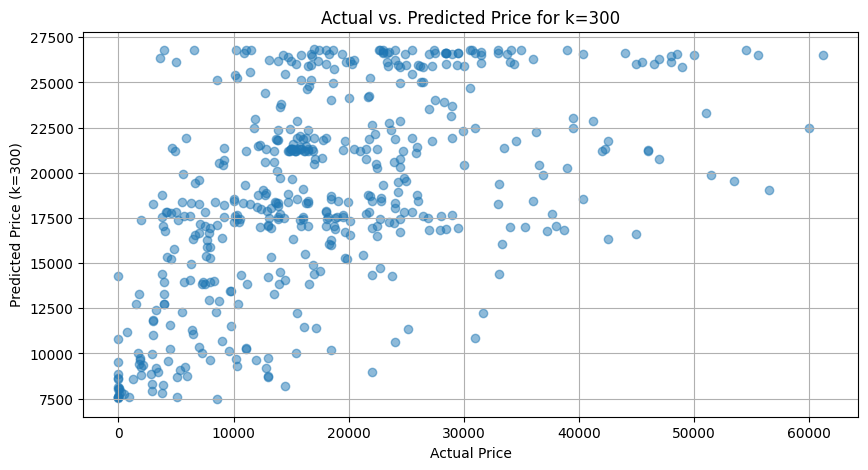

In [ ]:
# Question 4.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the range of k values to test
k_values = [3, 10, 25, 50, 100, 300]

# Initialize arrays to store SSE for training and testing sets
SSE_train = np.zeros(len(k_values))
SSE_test = np.zeros(len(k_values))

# Initialize a list to store predictions for scatterplots
predictions = []

# Loop through each value of k
for i, k in enumerate(k_values):
    # Create a kNN regression model for the current k
    model = KNeighborsRegressor(n_neighbors=k)

    # Train the model on the training data
    fitted_model = model.fit(X_train, y_train)

    # Predict values for the test set
    y_hat_test = fitted_model.predict(X_test)

    # Predict values for the training set
    y_hat_train = fitted_model.predict(X_train)

    # Compute and store the SSE for both training and testing sets
    SSE_train[i] = mean_squared_error(y_train, y_hat_train) * len(y_train)
    SSE_test[i] = mean_squared_error(y_test, y_hat_test) * len(y_test)

    # Store the predictions for the scatterplot
    predictions.append(y_hat_test)

# Plot SSE vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_values, SSE_train, label='Training Set', marker='o')
plt.plot(k_values, SSE_test, label='Testing Set', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('SSE vs. k in kNN Regression')
plt.legend()
plt.grid(True)
plt.show()

# Create scatterplots for different k values
for i, k in enumerate(k_values):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, predictions[i], alpha=0.5)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price (k={})'.format(k))
    plt.title('Actual vs. Predicted Price for k={}'.format(k))
    plt.grid(True)
    plt.show()




[44]


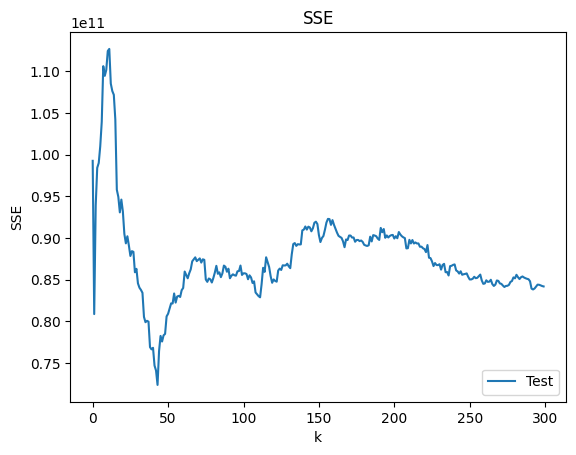

In [ ]:
# Determine the optimal k:
k_bar = 300
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(X_train,y_train) # Train the model on our data
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

#optimal value looks like its 44

Question 6
The models where the K value was lower than the optimal value the model was more complex with more data points and variance; because of its overcomplexities it more suptible to overfitting. The models where the predicted K was greater were less dense and complex; this oversimplification of the data entered could proudce  underfitting.

> Indented block



**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [55]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

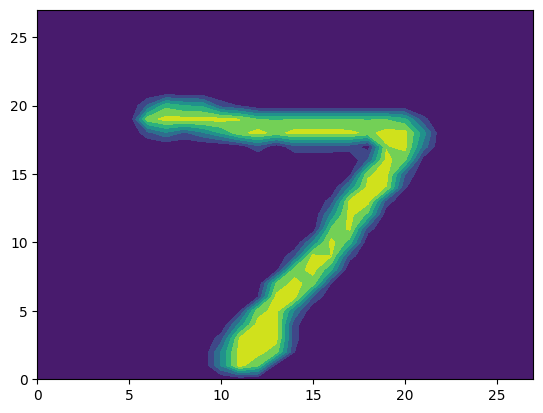

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

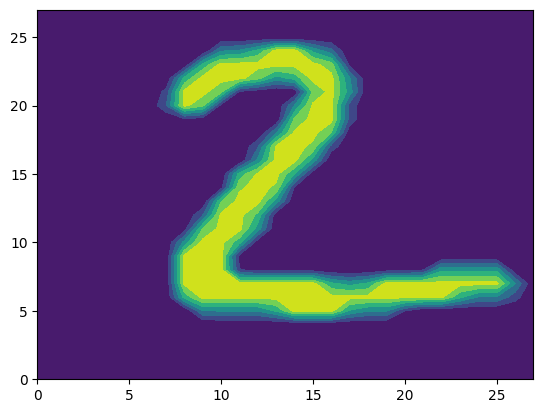

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

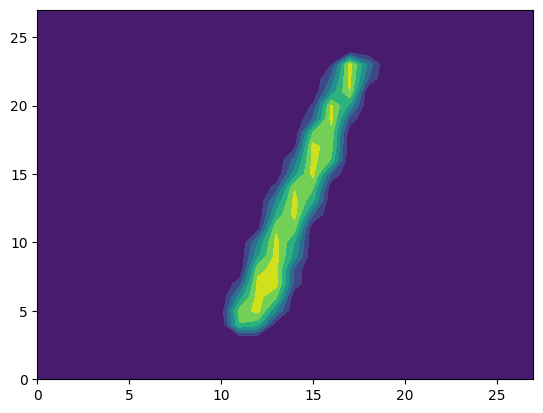

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

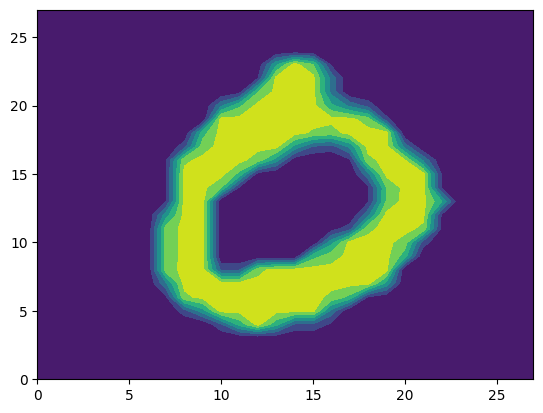

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

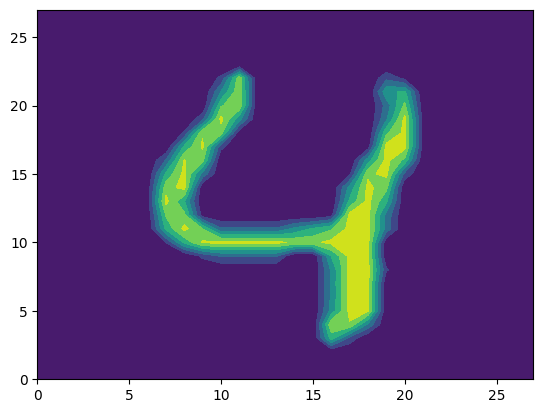

In [56]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
 print(y_test[i],'\n') # Print the label
 print(X_test[i],'\n') # Print the matrix of values
 plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
 plt.show()

In [57]:
X_train.shape
X_test.shape
X_train[i].shape
X_test[i].shape
y_test.shape
y_train.shape

(60000,)

Question 2
The shape of X_train is (60000, 28, 28) and the shape of X_test is (10000, 28, 28). The shape of X_train[i] and X_test[i] for each index i is (28, 28). The shape of y_train is (60000,) and the shape of y_test is (10000,).

In [58]:
#Question 3

N = X_train.shape[0]
WW = np.zeros((N, 784))
for i in range(N):
    WW[i,:] = X_train[i].reshape((1,784))

N = X_test.shape[0]
YY = np.zeros((N, 784))
for i in range(N):
    YY[i,:] = X_test[i].reshape((1,784))



In [59]:
#Question 4
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(WW, y_train) # pass both x and Y because you use the x to help predict the values that you then compare with true values
y_pred = knn.predict(YY)




In [31]:
#Q5
import pandas as pd
pd.crosstab(y_pred,y_test)


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,974,0,11,0,3,5,5,0,8,5
1,1,1133,8,3,7,0,3,22,3,7
2,1,2,991,3,0,0,0,4,5,3
3,0,0,2,976,0,12,0,0,13,9
4,0,0,1,1,944,2,3,3,6,7
5,1,0,0,13,0,862,2,0,12,3
6,2,0,1,1,4,4,945,0,5,1
7,1,0,15,6,2,1,0,988,5,10
8,0,0,3,3,1,2,0,0,913,2


Correct classifications: Sum of diagonal values = 974 + 1133 + 991 + 976 + 944 + 862 + 945 + 988 + 913 + 962 = 8758

Total instances in the test set: Sum of all values in the table = 10000

Accuracy for k=1 = (Correct Classifications / Total Instances) = 8758 / 10000 = 0.8758 (87.58%)

The predictor achieves an 87.58% accuracy on the test set using the selected number of neighbors, demonstrating its performance in making correct classifications.



Heres how I would answer 6

import cv2
import numpy as np

image = cv2.imread('your_image.jpg') # Load the image using OpenCV

b, g, r = cv2.split(image)# Split the image into RGB color channels


# Flatten the channels into 1D NumPy arrays
b = b.flatten()
g = g.flatten()
r = r.flatten()

data = np.column_stack((r, g, b)) # Combine the channels into a NumPy array




**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')